In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [4]:
#Now load the main data table and display it
worldometer_df = pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
worldometer_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [11]:
worldometer_df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [6]:
worldometer_df.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [20]:
worldometer_df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [21]:
worldometer_df.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.307950,0.225890,0.177861,0.309692,0.231260,0.179400
Total Tests,0.307950,1.000000,0.900321,0.811128,0.825681,0.744832,0.859148
Total Cases,0.225890,0.900321,1.000000,0.934705,0.829137,0.890988,0.977766
Total Deaths,0.177861,0.811128,0.934705,1.000000,0.840124,0.829517,0.892579
Total Recovered,0.309692,0.825681,0.829137,0.840124,1.000000,0.722190,0.694194
Serious or Critical,0.231260,0.744832,0.890988,0.829517,0.722190,1.000000,0.875427
Active Cases,0.179400,0.859148,0.977766,0.892579,0.694194,0.875427,1.000000


In [22]:
worldometer_df.isna().sum()/len(worldometer_df)

Date                   0.000000
Country                0.000000
Population             0.000000
Total Tests            0.166288
Total Cases            0.007421
Total Deaths           0.187188
Total Recovered        0.043162
Serious or Critical    0.376496
Active Cases           0.008935
dtype: float64

In [23]:
#To display a sub-table of a specific country :
country_name = 'Pakistan'

country_df = worldometer_df.loc[worldometer_df['Country'] == country_name, :].reset_index(drop=True)
country_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,Pakistan,220356788,92548.0,7638.0,143.0,1832.0,46.0,5663.0
1,2020-04-19,Pakistan,220356788,98522.0,8348.0,168.0,1868.0,46.0,6312.0
2,2020-04-20,Pakistan,220356788,104302.0,8892.0,176.0,1970.0,46.0,6746.0
3,2020-04-21,Pakistan,220356788,111806.0,9565.0,201.0,2073.0,46.0,7291.0
4,2020-04-22,Pakistan,220356788,118020.0,10076.0,212.0,2156.0,58.0,7708.0
5,2020-04-23,Pakistan,220356788,124549.0,11057.0,235.0,2337.0,60.0,8485.0
6,2020-04-24,Pakistan,220356788,138147.0,11940.0,253.0,2755.0,111.0,8932.0
7,2020-04-25,Pakistan,220356788,144365.0,12723.0,269.0,2866.0,111.0,9588.0
8,2020-04-26,Pakistan,220356788,144365.0,13328.0,281.0,2936.0,111.0,10111.0
9,2020-04-27,Pakistan,220356788,150756.0,13915.0,292.0,3029.0,111.0,10594.0


In [24]:
#To display a sub-table of a specific date 
selected_date = datetime.strptime('18/05/2020', '%d/%m/%Y')
selected_date_df = worldometer_df.loc[worldometer_df['Date'] == selected_date.strftime('%Y-%m-%d'), :].reset_index(drop=True)
selected_date_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN
...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [25]:
#Now lets take the last date and continue our analysis
last_date = datetime.strptime('18/05/2020', '%d/%m/%Y')
last_date_df = worldometer_df.loc[worldometer_df['Date'] == last_date.strftime('%Y-%m-%d'), :].reset_index(drop=True)
last_date_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN
...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


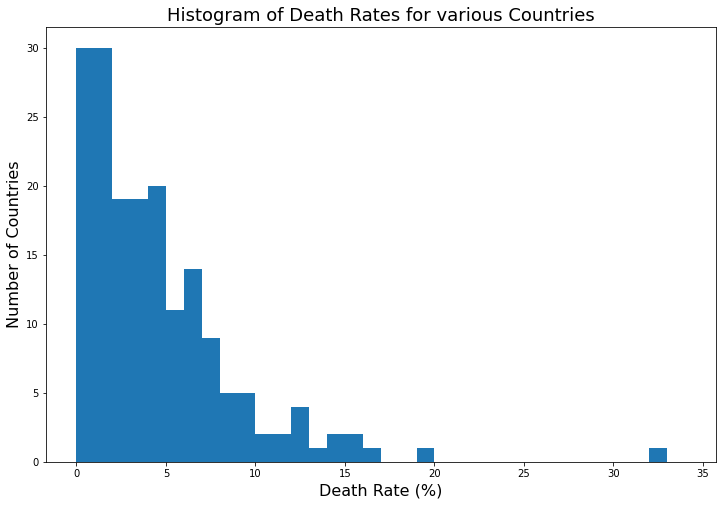

In [26]:
#Now calculate the naive death rate for each country and show histogram
last_date_df['Case Fatality Ratio'] = last_date_df['Total Deaths'] / last_date_df['Total Cases']

plt.figure(figsize=(12,8))
plt.hist(100 * np.array(last_date_df['Case Fatality Ratio']), bins=np.arange(35))
plt.xlabel('Death Rate (%)', fontsize=16)
plt.ylabel('Number of Countries', fontsize=16)
plt.title('Histogram of Death Rates for various Countries', fontsize=18)
plt.show()

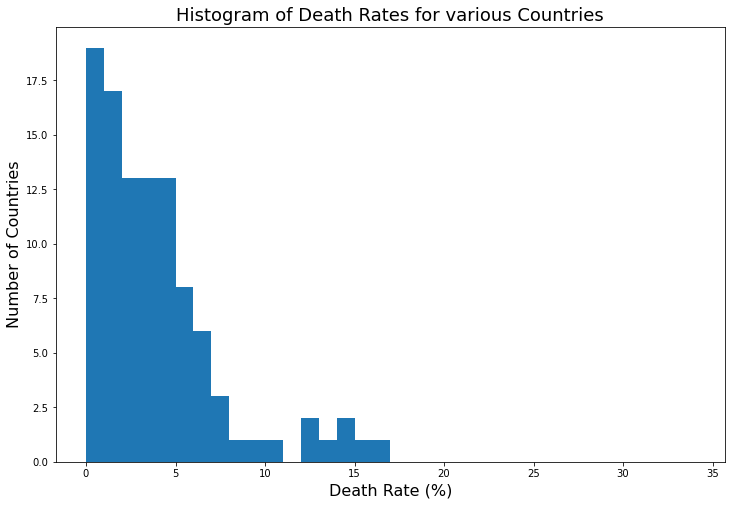

In [27]:
###########We see a large spread of death rates between countries##########
#Filter out countries with small amount of cases
min_number_of_cases = 1000
greatly_affected_df = last_date_df.loc[last_date_df['Total Cases'] > min_number_of_cases,:]
plt.figure(figsize=(12,8))
plt.hist(100 * np.array(greatly_affected_df['Case Fatality Ratio']), bins=np.arange(35))
plt.xlabel('Death Rate (%)', fontsize=16)
plt.ylabel('Number of Countries', fontsize=16)
plt.title('Histogram of Death Rates for various Countries', fontsize=18)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


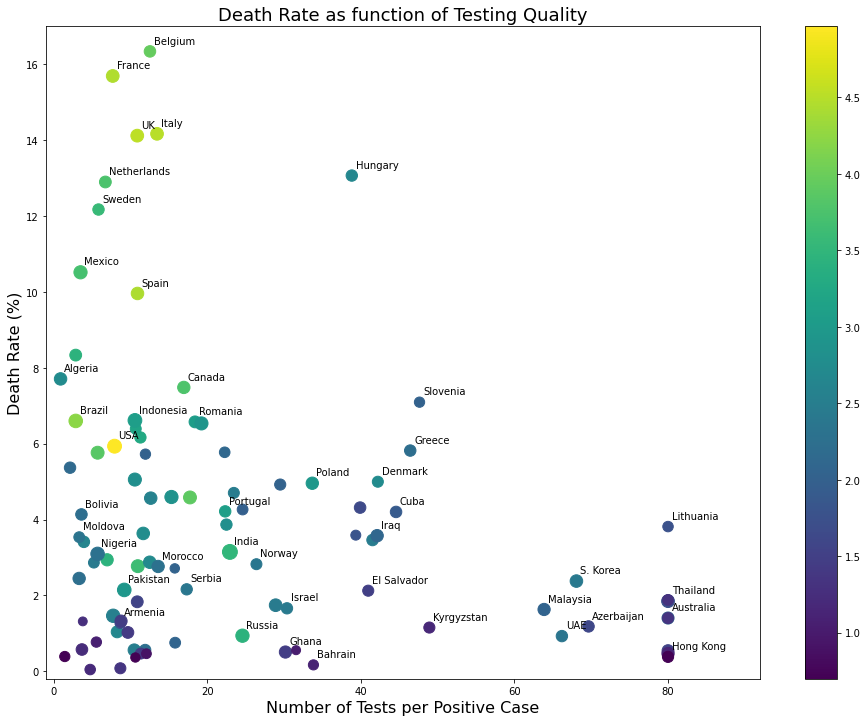

In [28]:
#Plot scatter of death rate as function of testing quality
last_date_df['Num Tests per Positive Case'] = last_date_df['Total Tests'] / last_date_df['Total Cases']

min_number_of_cases = 1000
greatly_affected_df = last_date_df.loc[last_date_df['Total Cases'] > min_number_of_cases,:]

x_axis_limit = 80

death_rate_percent = 100 * np.array(greatly_affected_df['Case Fatality Ratio'])
num_test_per_positive = np.array(greatly_affected_df['Num Tests per Positive Case'])
num_test_per_positive[num_test_per_positive > x_axis_limit] = x_axis_limit
total_num_deaths = np.array(greatly_affected_df['Total Deaths'])
population = np.array(greatly_affected_df['Population'])

plt.figure(figsize=(16,12))
plt.scatter(x=num_test_per_positive, y=death_rate_percent, 
            s=0.5*np.power(np.log(1+population),2), 
            c=np.log10(1+total_num_deaths))
plt.colorbar()
plt.ylabel('Death Rate (%)', fontsize=16)
plt.xlabel('Number of Tests per Positive Case', fontsize=16)
plt.title('Death Rate as function of Testing Quality', fontsize=18)
plt.xlim(-1, x_axis_limit + 12)
plt.ylim(-0.2,17)

# plot on top of the figure the names of the
#countries_to_display = greatly_affected_df['Country'].unique().tolist()
countries_to_display = ['USA', 'Russia', 'Spain', 'Brazil', 'UK', 'Italy', 'France', 
                        'Pakistan', 'India', 'Canada', 'Belgium', 'Mexico', 'Netherlands', 
                        'Sweden', 'Portugal', 'UAE', 'Poland', 'Indonesia', 'Romania', 
                        'Israel','Thailand','Kyrgyzstan','El Salvador', 'S. Korea', 
                        'Denmark', 'Serbia', 'Norway', 'Algeria', 'Bahrain','Slovenia',
                        'Greece','Cuba','Hong Kong','Lithuania', 'Australia', 'Morocco', 
                        'Malaysia', 'Nigeria', 'Moldova', 'Ghana', 'Armenia', 'Bolivia', 
                        'Iraq', 'Hungary', 'Cameroon', 'Azerbaijan']

for country_name in countries_to_display:
    country_index = greatly_affected_df.index[greatly_affected_df['Country'] == country_name]
    plt.text(x=num_test_per_positive[country_index] + 0.5,
             y=death_rate_percent[country_index] + 0.2,
             s=country_name, fontsize=10)
plt.show()

In [29]:
#Now let’s look at data from best testing countries
#Lets decide that the cutoff for good testing country is 50 tests per positive cases.
good_testing_threshold = 50
good_testing_df = greatly_affected_df.loc[greatly_affected_df['Num Tests per Positive Case'] > good_testing_threshold,:]
good_testing_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case
28,2020-05-18,UAE,9875965,1600923.0,24190.0,224.0,9577.0,1.0,14389.0,0.009260,66.181191
43,2020-05-18,S. Korea,51264120,753211.0,11065.0,263.0,9904.0,55.0,898.0,0.023769,68.071487
53,2020-05-18,Australia,25464216,1062034.0,7060.0,99.0,6392.0,12.0,569.0,0.014023,150.429745
55,2020-05-18,Malaysia,32315733,443263.0,6941.0,113.0,5615.0,13.0,1213.0,0.016280,63.861547
56,2020-05-18,Kazakhstan,18749587,540708.0,6440.0,35.0,3469.0,31.0,2936.0,0.005435,83.960870
68,2020-05-18,Azerbaijan,10128288,235910.0,3387.0,40.0,2055.0,37.0,1292.0,0.011810,69.651609
69,2020-05-18,Thailand,69779718,286008.0,3031.0,56.0,2857.0,61.0,118.0,0.018476,94.360937
72,2020-05-18,Uzbekistan,33409960,460000.0,2791.0,13.0,2314.0,8.0,464.0,0.004658,164.815478
86,2020-05-18,Lithuania,2726360,231104.0,1547.0,59.0,997.0,17.0,491.0,0.038138,149.388494
89,2020-05-18,New Zealand,4817585,230718.0,1499.0,21.0,1433.0,NaN,45.0,0.014009,153.914610


In [30]:
#Lets calculate the Death Rate for these countries
estimated_death_rate_percent = 100 * good_testing_df['Total Deaths'].sum() / good_testing_df['Total Cases'].sum()
print('Death Rate only for "good testing countries" is %.2f%s' %(estimated_death_rate_percent,'%'))

Death Rate only for "good testing countries" is 1.36%
